In [64]:
from PIL import Image, ImageEnhance, ImageMath, ImageOps
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import glob
import re

In [67]:
# * START OF USER INPUTS
# Working directory, where all the files are located
working_dir = r'/home/vivek/Tobias_Group/Piezo1/Alans RIP Talk ColorCodedOverlay/'

# Video name for plot title and output plot
analyzedFileName = "Alan's RIP Talk"

# DIC .tiff file name
DIC_tif_name = 'AL_28_2019-09-22-TIRFM_Diff_tdt-MEFs_A_dic_Before_MMStack_Pos0.ome.tif'

# Which image in the DIC .tiff stack, first image is indexed as 0, second is 1, etc.
stackPosition = 3

# hdf5 formated compressed dataframe
input_predictedTracks_file_name = 'Alans_RIP_Talk_103Tracks_predClasses_20NOV2020.h5'  #NOT DONE

# Automatically name and save the plot in the working directory
autoSavePlot = True

# * END OF USER INPUTS

       Frame                     X                     Y   ID  PredictedClass
0          0   47.6980761270214941  280.9834514246985577    0               2
1          1   47.4474190445726691  280.9832548048038916    0               2
2          2   47.3018075388226649  281.1388482936461060    0               2
3          3   47.2720110524981010  281.0866362613877527    0               2
4          4   47.1044613047671703  280.9908225370471087    0               2
...      ...                   ...                   ...  ...             ...
34722    197  950.9811989957111109  568.0680418615924054  102               2
34723    198  950.9523801117414905  568.1665138169299780  102               2
34724    199  951.4225848260763314  567.2987011021431272  102               2
34725    200  951.1937363832595338  568.0175016779912767  102               2
34726    201  951.4692384949997859  567.9732153926480578  102               2

[34281 rows x 5 columns]
I;16B


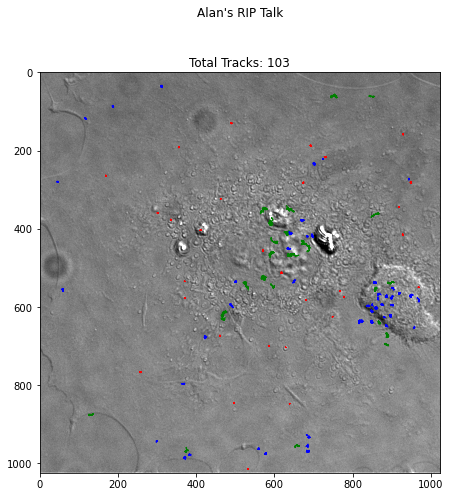

In [73]:
# Import the pickled file as a dataframe
tempDataFrame = pd.read_hdf((Path(working_dir) / input_predictedTracks_file_name))
print(tempDataFrame)

# Set the precision of float values to 16 decimals
pd.set_option('display.precision',16)

regex = re.compile(r'\d+')

# Background DIC .tiff image with appropriate slice selected
bg_DIC_img = os.path.join(working_dir, DIC_tif_name)
# Load the tiff stack
imStack = Image.open(bg_DIC_img)
imStack.load()

# Extract the dic frame
imStack.seek(stackPosition)
imDicFrame = imStack.copy()

enhanced_im = imDicFrame

img_dic = enhanced_im
print(img_dic.mode)
# img_dic = np.flipud(enhanced_im)

# Set up the plot with the background image
# Plot tracks on TIRFM image
subplot_kw = dict(xlim=(0, 1024), ylim=(1024, 0), autoscale_on=False)
fig, axes = plt.subplots(1, 1, subplot_kw=subplot_kw, figsize=(10, 7))
imgplot1 = axes.imshow(img_dic, cmap=plt.get_cmap('gray'), vmin=200, vmax=800)

# print rg of a track index
# print(float(RgDf_input[RgDf_input[0] == '498577'][1]))

# Plot the tracks
trackID_list = list(tempDataFrame.ID.unique())

for trackID in trackID_list:
    indivTrack_df = tempDataFrame.loc[tempDataFrame['ID'] == trackID, ['X', 'Y', 'PredictedClass']]
    indivTrackClass = int(indivTrack_df.PredictedClass.unique())
    if indivTrackClass == 0:
        colorValue = 'green'
    if indivTrackClass == 1:
        colorValue = 'red'
    if indivTrackClass == 2:
        colorValue = 'blue'
    plt.plot(indivTrack_df.X, indivTrack_df.Y, color=colorValue, linewidth=1)

totalTracks = len(trackID_list)
plt.suptitle(f'{analyzedFileName}')
plt.title(f'Total Tracks: {totalTracks}')


fig.tight_layout(rect=[0, 0, 1, .95])
# if autoSavePlot:
#     plt.savefig(working_dir + analyzedFileName + '_RgDf-Overlay.png', bbox_inches='tight')
plt.show()